In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
#importing seaborn for statistical plots
import seaborn as sns
# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.formula.api as smf

In [3]:
hsDF=pd.read_csv('kc_house_data.csv')

In [4]:
hsDF.describe().T

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


In [5]:
hsDFPrun=hsDF.drop('id',axis=1)

In [6]:
hsDFPrun

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


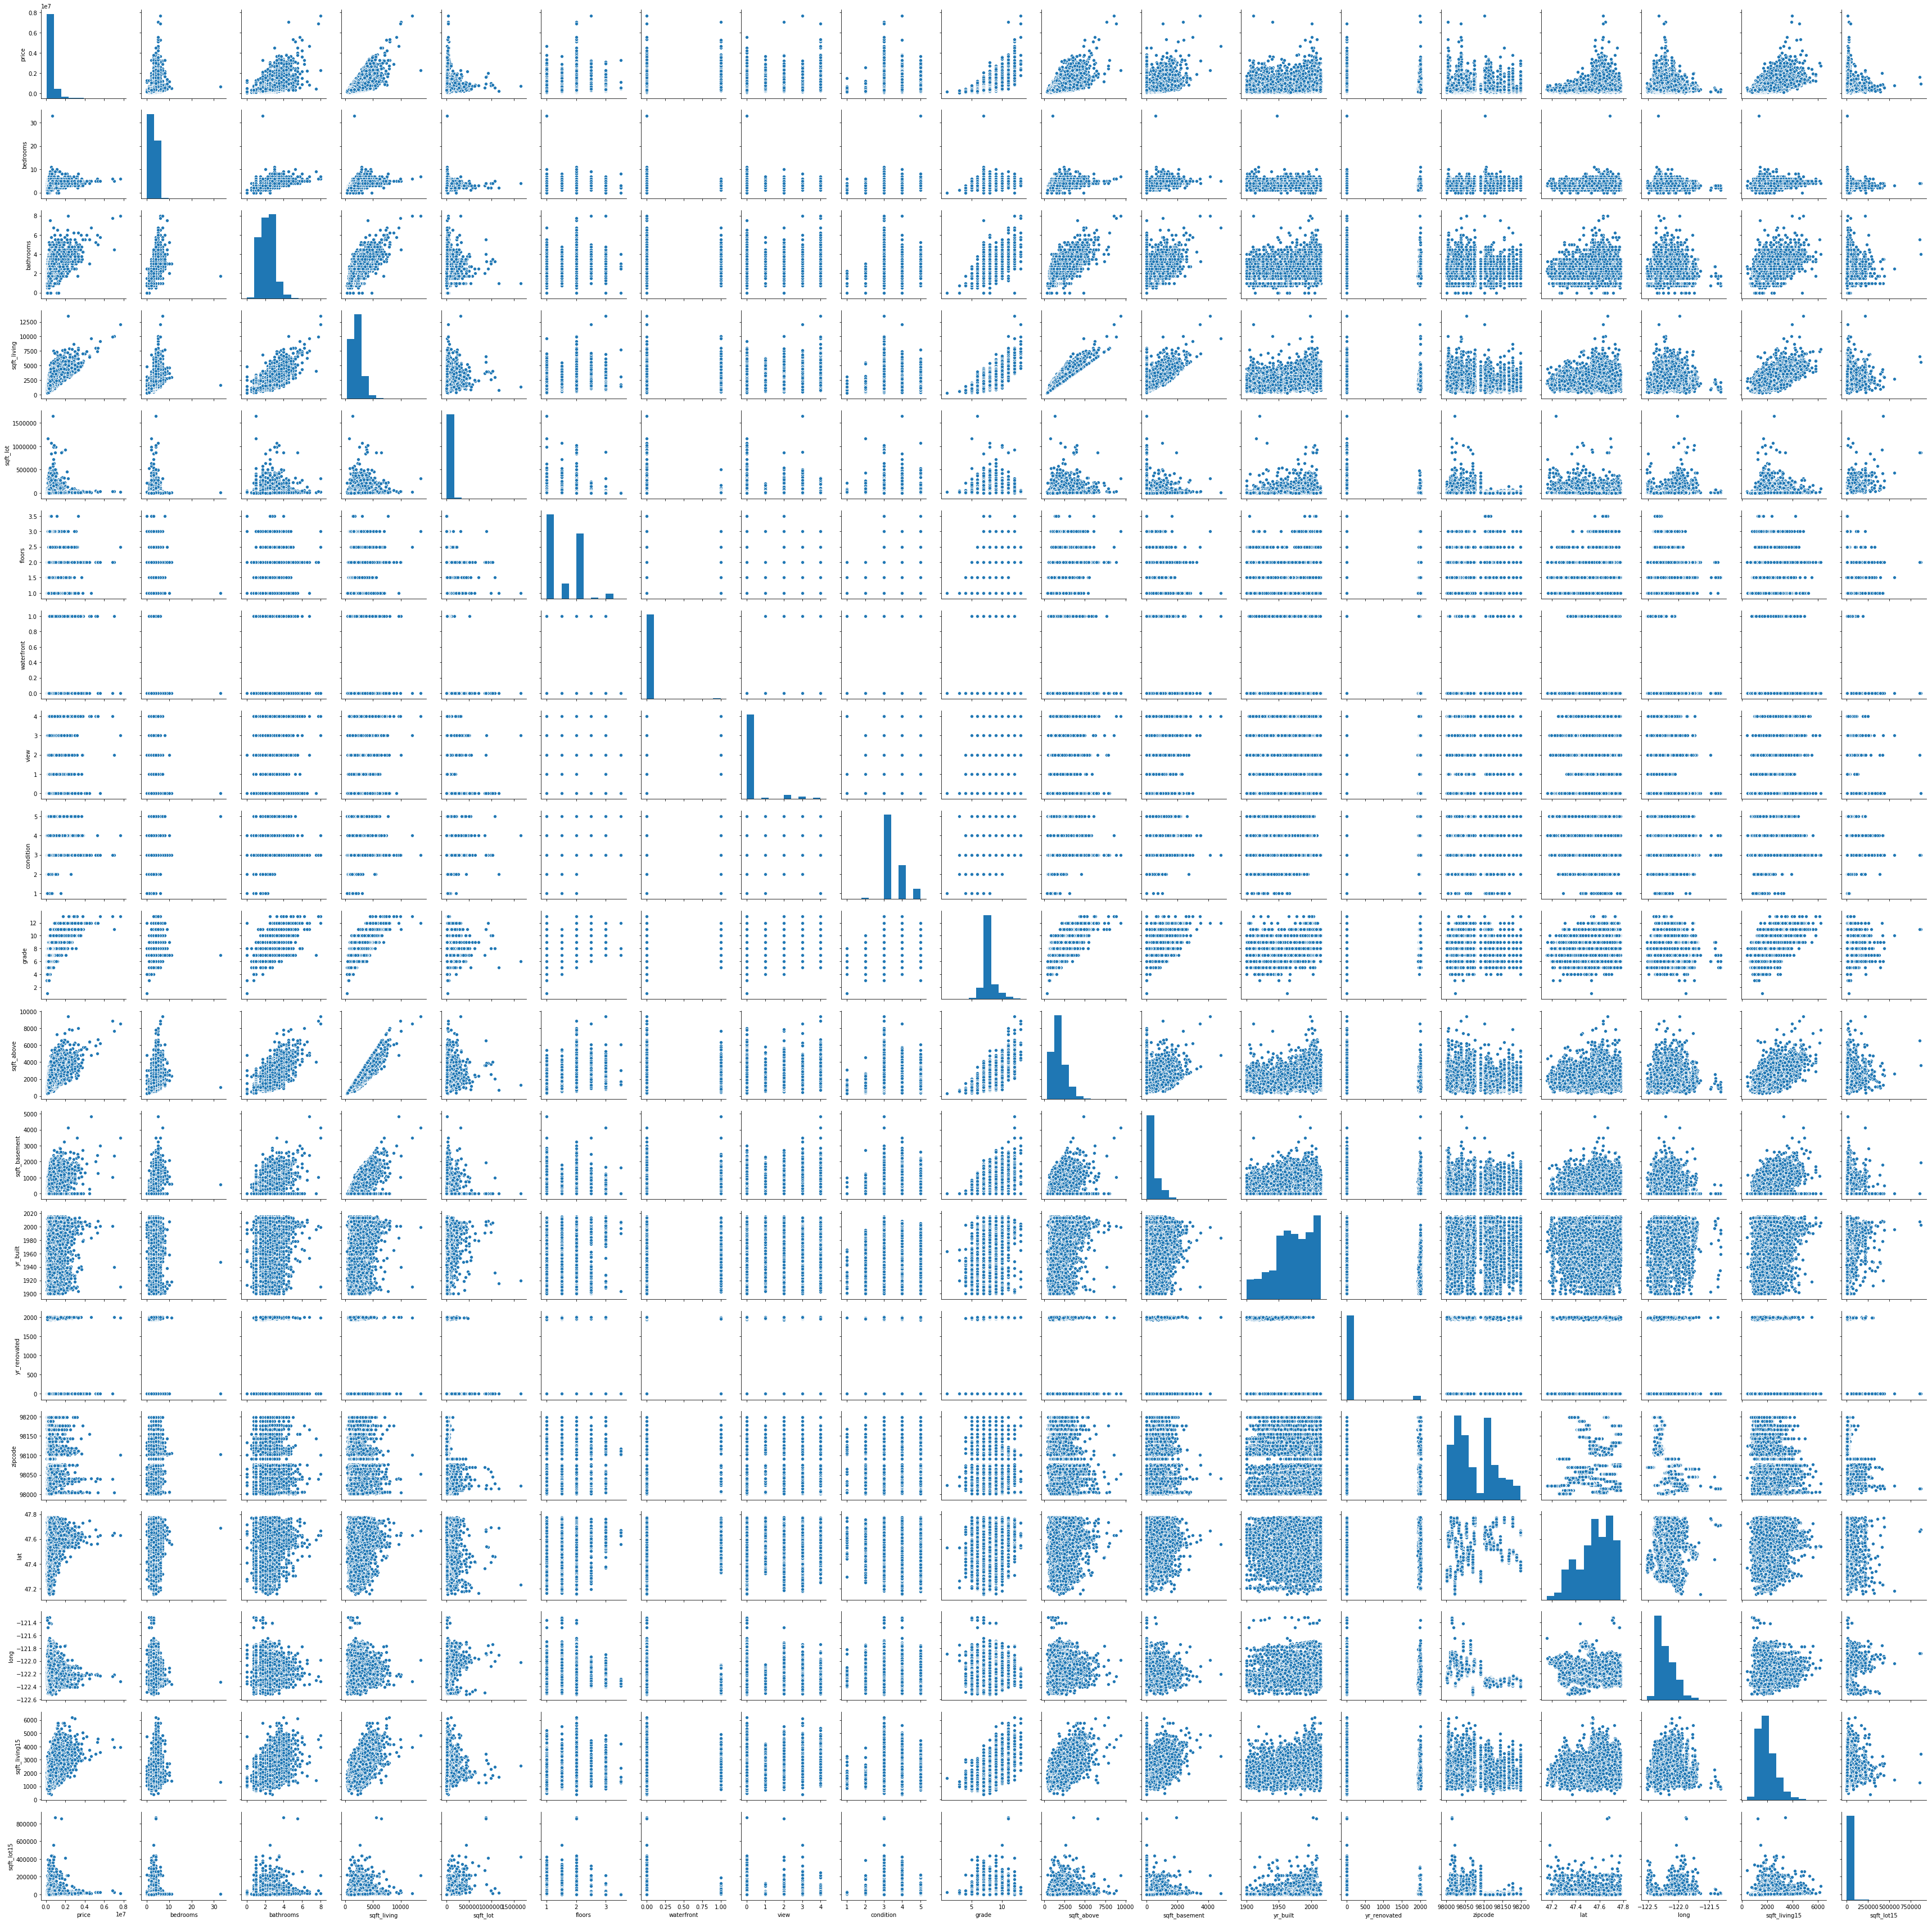

In [7]:
sns.pairplot(hsDFPrun)

In [8]:
hsDFPrun.isna().any()

date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

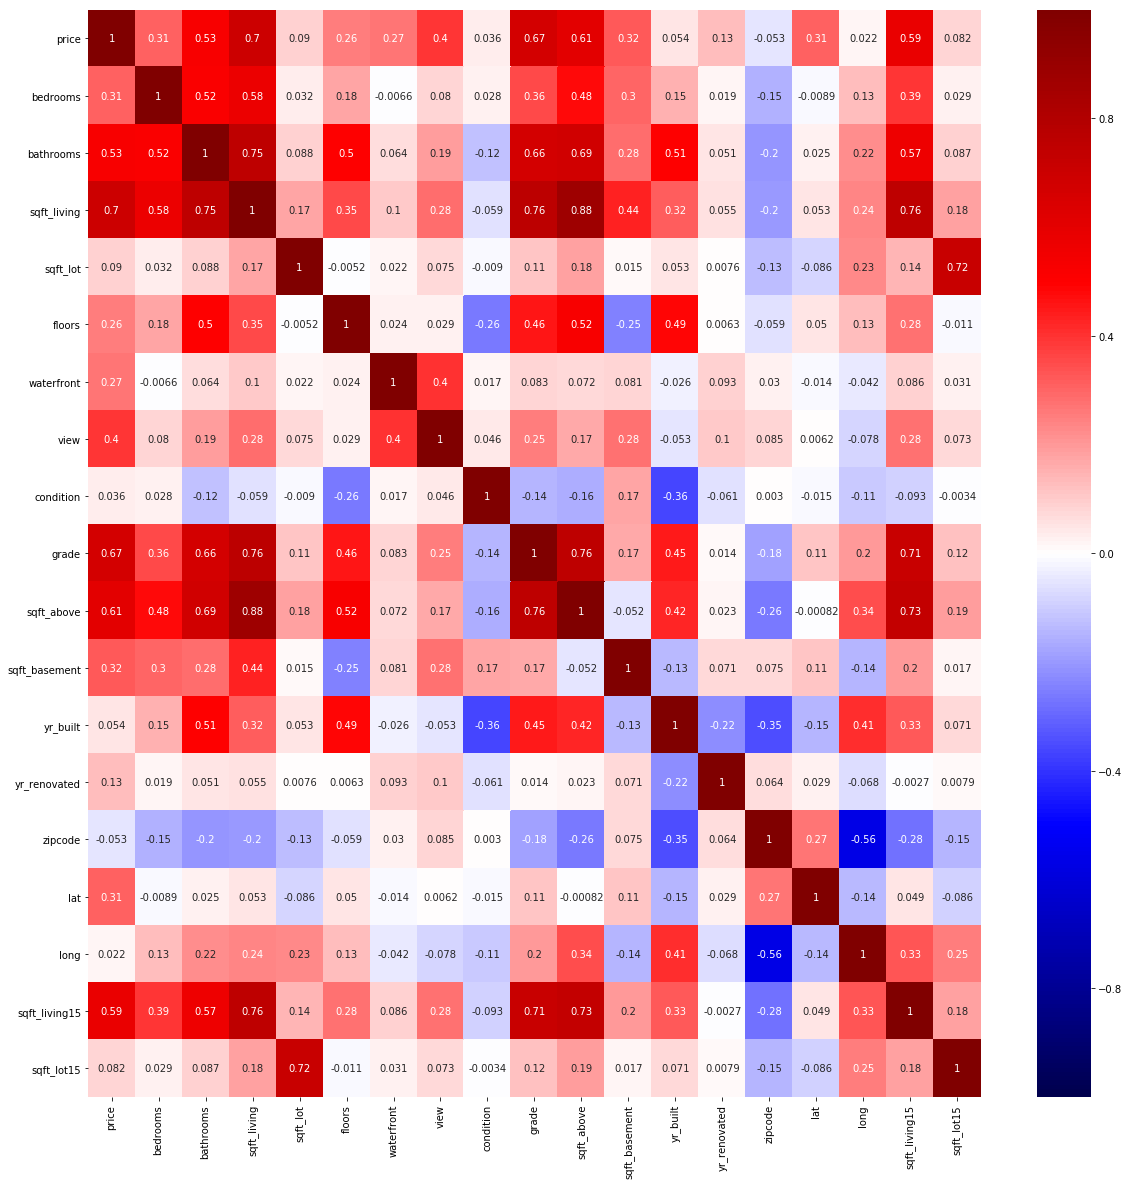

In [9]:
plt.figure(figsize=(20,20))
sns.heatmap(hsDFPrun.corr(),cmap='seismic', annot=True,vmax=1,vmin=-1)


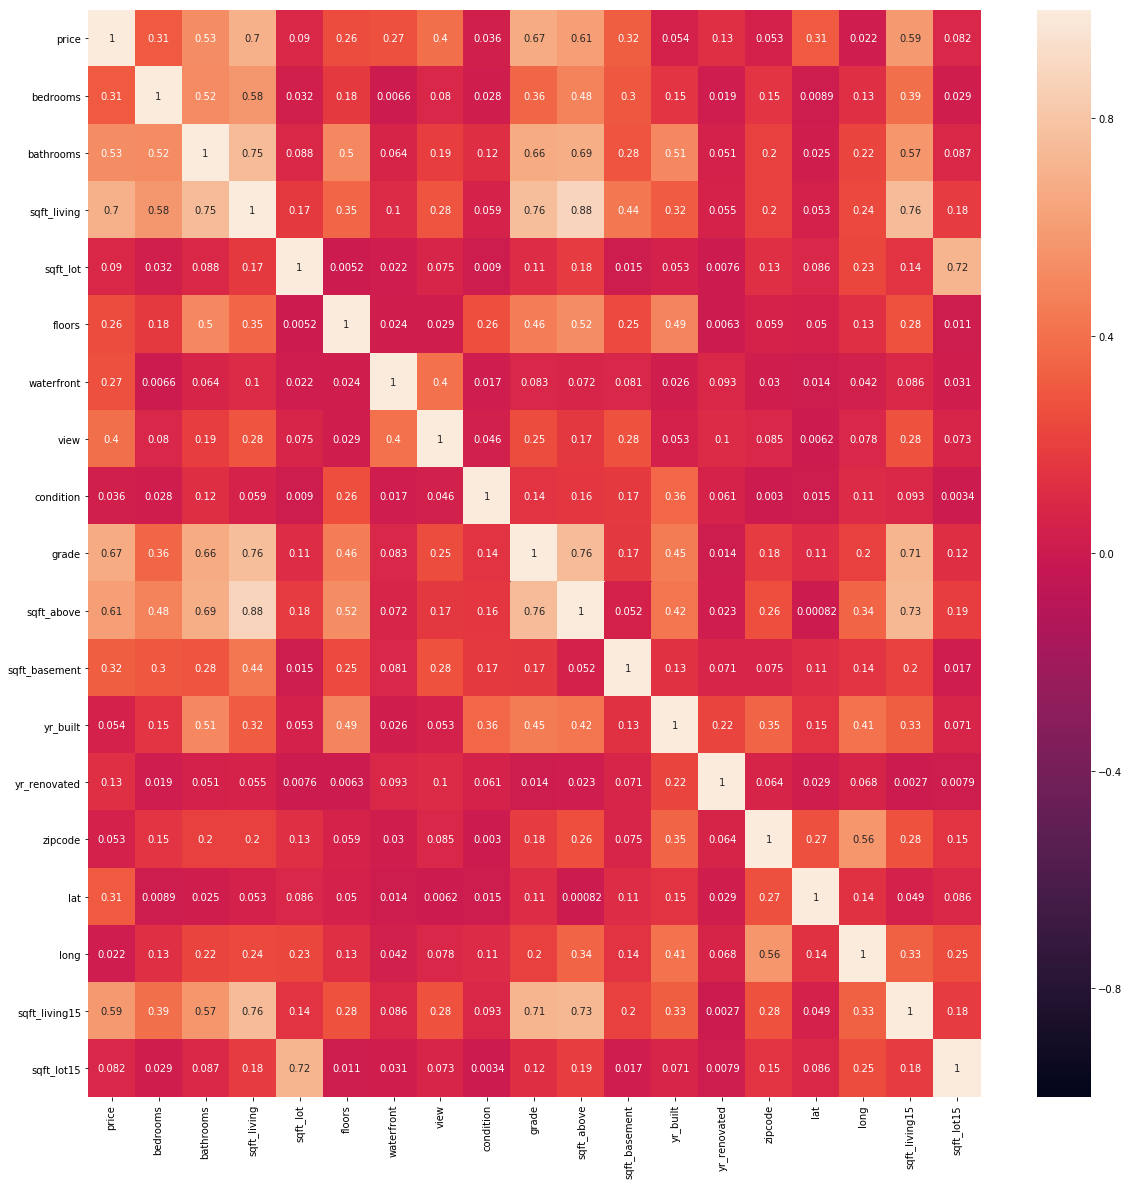

In [10]:
plt.figure(figsize=(20,20))
sns.heatmap(abs(hsDFPrun.corr()),annot=True,vmax=1,vmin=-1)

Overall the data doesnt seem to have a very high correlation with among the dataset. We can observe that coniditon,yr_renovated,condition,sqft+lot,sq_ftbasement and waterfront, zipcode, lat, long  feature have a low  correlation with other features present in the dataset. Bedroom, bathroom sqfr_living,grade , floors sqft_lviving15 have a better correlation overall

In [23]:
from scipy.stats import zscore
from sklearn.model_selection import train_test_split

In [12]:
## Adjusted R^2
def AdjRsquare(modelToBeTested, indData, target):
    Rsquare = modelToBeTested.score(indData, target)
    NoData = len(target)
    p = indData.shape[1]
    tempRsquare = 1 - (1-Rsquare)*(NoData-1)/(NoData - p - 1)
    return tempRsquare

In [13]:
## Combine all the steps to test the model performance
def linRegcheckModelPerformance(x, y,model):
    x=x.apply(zscore)
    # Covert data into train and test
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, 
                                                        random_state = 1)
    # Build model with train data set
    model.fit(x_train, y_train)
    # Train accuracies
    trainR2 = model.score(x_train, y_train)
    predictedSales = model.predict(x_train)
    mse = metrics.mean_squared_error(predictedSales, y_train)
    trainRmse = np.sqrt(mse)
    trainRmsePct = trainRmse/np.mean(np.mean(np.array(y_train)))*100
    trainAdjR2 = AdjRsquare(model, x_train, y_train)
    trainAccuracies = [len(y_train), trainRmse, trainRmsePct, trainR2, trainAdjR2]
    # Test accuracies
    testR2 = model.score(x_test, y_test)
    predictedSales = model.predict(x_test)
    mse = metrics.mean_squared_error(predictedSales, y_test)
    testRmse = np.sqrt(mse)
    testRmsePct = testRmse/np.mean(np.mean(np.array(y_test)))*100
    testAdjR2 = AdjRsquare(model, x_test, y_test)
    testAccuracies = [len(y_test), testRmse, testRmsePct, testR2, testAdjR2]
    # Create dataframe for results
    resultsDf = pd.DataFrame(index = ["dataSize", "rmse", "rmsePct", "r2", "adjR2"])
    resultsDf['trainData'] = trainAccuracies
    resultsDf['testData'] = testAccuracies
    return ( round(resultsDf, 4))

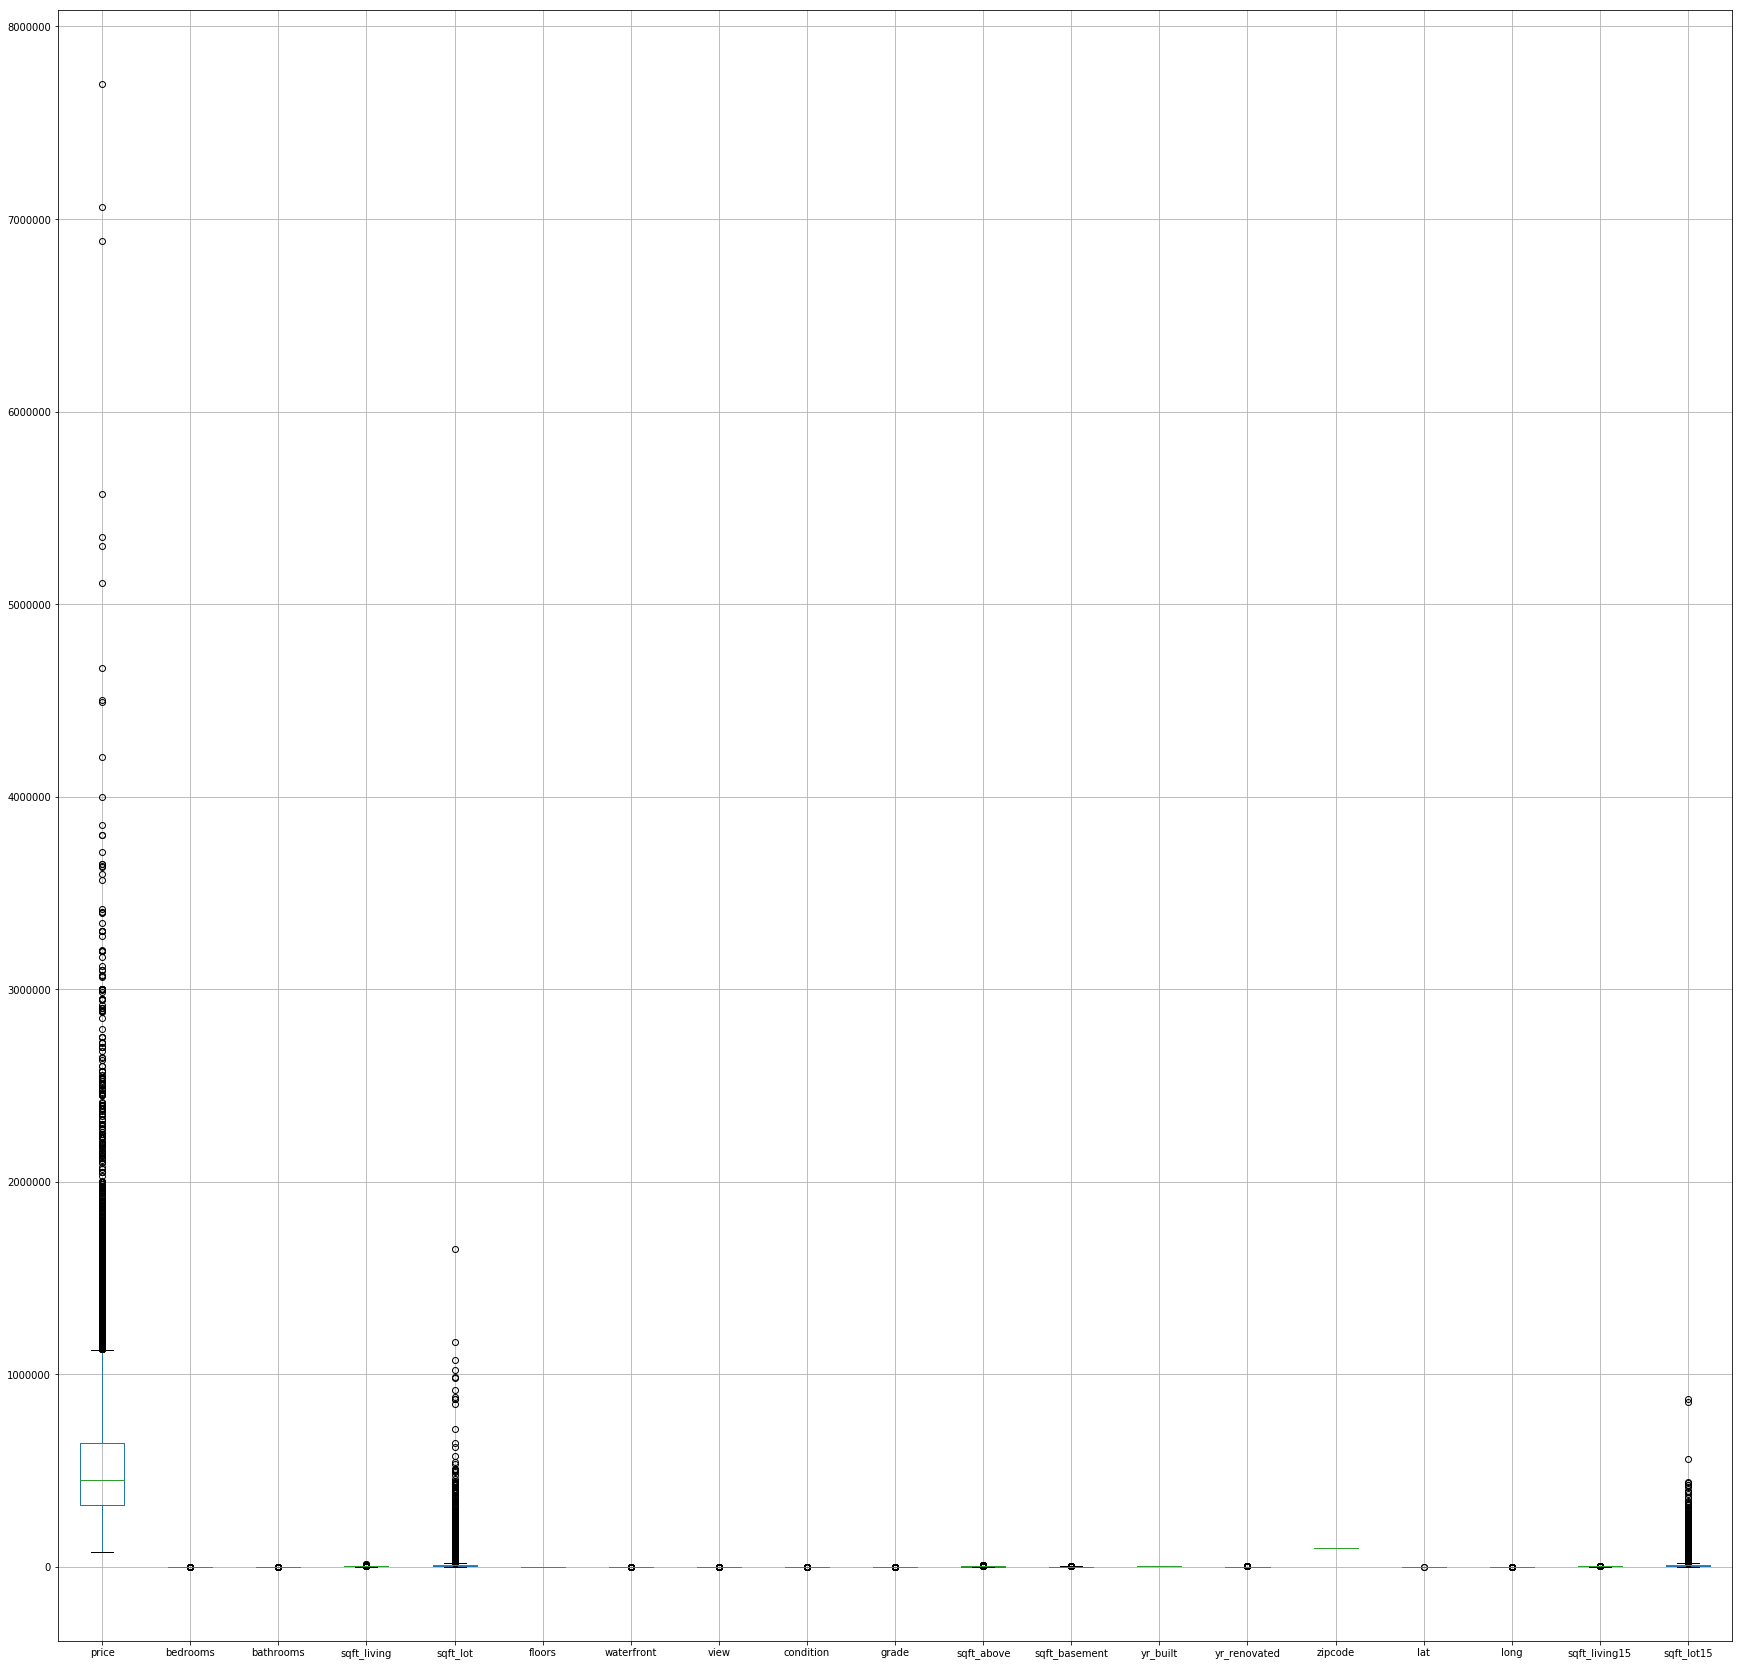

In [14]:
import matplotlib
MEDIUM_SIZE = 10
matplotlib.rc('font', size=MEDIUM_SIZE)
fig, ax = plt.subplots(figsize=(30,  30))
plt.xticks(rotation=180)

hsDFPrun.boxplot(ax=ax)

In [15]:
y=hsDFPrun['price']
#X=hsDFPrun.drop('price',axis=1)


In [16]:
X=hsDFPrun.drop(['date','price'],axis=1)

In [17]:
X.head(5)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# We se that tthere are outliers present in data sets as well specially wtih  price , sqft_lot , sqft_lot15 which shows a
presence of significant outliers in the respective features

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
linreg = LinearRegression()

In [20]:
X.shape

(21613, 18)

In [24]:
linRegcheckModelPerformance(X,y,linreg)

,trainData,testData
dataSize,17290.0000,4323.0000
rmse,192671.0523,232850.3621
rmsePct,35.8204,42.4199
r2,0.7037,0.6859
adjR2,0.7034,0.6846


In [25]:
from sklearn.tree import DecisionTreeRegressor

In [29]:
dcR=DecisionTreeRegressor()

In [30]:
linRegcheckModelPerformance(X,y,dcR)

,trainData,testData
dataSize,17290.0000,4323.0000
rmse,9593.0495,198515.4625
rmsePct,1.7835,36.1649
r2,0.9993,0.7717
adjR2,0.9993,0.7707


In [ ]:
scoring = 'accuracy'

In [32]:
from sklearn import model_selection

In [33]:
kfold = model_selection.KFold(n_splits=10, random_state=12345)

In [34]:
cv_results = model_selection.cross_val_score(linreg, X, y, cv=kfold)

In [35]:
cv_results

array([0.69572253, 0.69825289, 0.68884931, 0.69253184, 0.68095807,
       0.70406343, 0.71124795, 0.70874403, 0.69991629, 0.6715889 ])

In [36]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

In [116]:
# Build step forward feature selection
sfs1 = sfs(linreg, k_features=6, forward=False, scoring='r2', cv=11)

In [117]:
 xstd=X.apply(zscore)

In [118]:
x_train, x_test, y_train, y_test = train_test_split(xstd, y, test_size=0.2, 
                                                        random_state = 1)

In [119]:

sfs1 = sfs1.fit(x_train.values, y_train.values)

In [120]:
sfs1.get_metric_dict()

{18: {'feature_idx': (0,
   1,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   9,
   10,
   11,
   12,
   13,
   14,
   15,
   16,
   17),
  'cv_scores': array([0.69242737, 0.71762163, 0.72323573, 0.70167625, 0.69059884,
         0.68715669, 0.71404945, 0.71198572, 0.68779648, 0.70294794,
         0.69730608]),
  'avg_score': 0.702436562353623,
  'feature_names': ('0',
   '1',
   '2',
   '3',
   '4',
   '5',
   '6',
   '7',
   '8',
   '9',
   '10',
   '11',
   '12',
   '13',
   '14',
   '15',
   '16',
   '17'),
  'ci_bound': 0.008406078727956876,
  'std_dev': 0.012077480327051747,
  'std_err': 0.0038192346229358833},
 17: {'feature_idx': (0,
   1,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   9,
   11,
   12,
   13,
   14,
   15,
   16,
   17),
  'cv_scores': array([0.69242737, 0.71762163, 0.72323573, 0.70168871, 0.69059884,
         0.68715669, 0.71404945, 0.71198572, 0.68779648, 0.70294794,
         0.69730608]),
  'avg_score': 0.7024376952415186,
  'feature_names': ('0',
   '1',
   '2',

In [121]:
# Which features?
columnList = list(x_train.columns)
feat_cols = list(sfs1.k_feature_idx_)
print(feat_cols)

[2, 5, 6, 8, 11, 14]


In [122]:
subsetColumnList = [columnList[i] for i in feat_cols] 
print(subsetColumnList)

['sqft_living', 'waterfront', 'view', 'grade', 'yr_built', 'lat']


In [123]:
linRegcheckModelPerformance(X[subsetColumnList],y,linreg)

,trainData,testData
dataSize,17290.0000,4323.0000
rmse,197649.6106,238925.2440
rmsePct,36.7460,43.5266
r2,0.6882,0.6693
adjR2,0.6881,0.6688


In [124]:
##Even with Forward selection we see that the score remains similar 

In [132]:
from sklearn.preprocessing import StandardScaler

In [133]:
X_std = StandardScaler().fit_transform(X)

In [134]:
def linRegcheckModelPerformanceWithOutZ(x, y,model):
    #x=x.apply(zscore)
    # Covert data into train and test
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, 
                                                        random_state = 1)
    # Build model with train data set
    model.fit(x_train, y_train)
    # Train accuracies
    trainR2 = model.score(x_train, y_train)
    predictedSales = model.predict(x_train)
    mse = metrics.mean_squared_error(predictedSales, y_train)
    trainRmse = np.sqrt(mse)
    trainRmsePct = trainRmse/np.mean(np.mean(np.array(y_train)))*100
    trainAdjR2 = AdjRsquare(model, x_train, y_train)
    trainAccuracies = [len(y_train), trainRmse, trainRmsePct, trainR2, trainAdjR2]
    # Test accuracies
    testR2 = model.score(x_test, y_test)
    predictedSales = model.predict(x_test)
    mse = metrics.mean_squared_error(predictedSales, y_test)
    testRmse = np.sqrt(mse)
    testRmsePct = testRmse/np.mean(np.mean(np.array(y_test)))*100
    testAdjR2 = AdjRsquare(model, x_test, y_test)
    testAccuracies = [len(y_test), testRmse, testRmsePct, testR2, testAdjR2]
    # Create dataframe for results
    resultsDf = pd.DataFrame(index = ["dataSize", "rmse", "rmsePct", "r2", "adjR2"])
    resultsDf['trainData'] = trainAccuracies
    resultsDf['testData'] = testAccuracies
    return ( round(resultsDf, 4))

In [169]:
linRegcheckModelPerformanceWithOutZ(X_std,y,linreg)

,trainData,testData
dataSize,17290.0000,4323.0000
rmse,192671.0523,232850.3621
rmsePct,35.8204,42.4199
r2,0.7037,0.6859
adjR2,0.7034,0.6846


In [168]:
linRegcheckModelPerformance(X,y,linreg)

,trainData,testData
dataSize,17290.0000,4323.0000
rmse,192671.0523,232850.3621
rmsePct,35.8204,42.4199
r2,0.7037,0.6859
adjR2,0.7034,0.6846


In [167]:
linRegcheckModelPerformance(X[subsetColumnList],y,linreg)

,trainData,testData
dataSize,17290.0000,4323.0000
rmse,197649.6106,238925.2440
rmsePct,36.7460,43.5266
r2,0.6882,0.6693
adjR2,0.6881,0.6688


In [156]:
from sklearn.preprocessing import MinMaxScaler

In [161]:
scaler=MinMaxScaler().fit(X)

In [162]:
XminmAx=scaler.transform(X)

In [166]:
linRegcheckModelPerformanceWithOutZ(XminmAx,y,linreg)

,trainData,testData
dataSize,17290.0000,4323.0000
rmse,192671.0915,232860.6963
rmsePct,35.8204,42.4218
r2,0.7037,0.6858
adjR2,0.7034,0.6845


In [165]:
linRegcheckModelPerformanceWithOutZ(XminmAx,y,linreg)

,trainData,testData
dataSize,17290.0000,4323.0000
rmse,192671.0915,232860.6963
rmsePct,35.8204,42.4218
r2,0.7037,0.6858
adjR2,0.7034,0.6845


# Conclusion - MinMaxsclare applied, with featues pruned most highest r2 score is approx 70%

In [175]:
newX=X[['bathrooms','sqft_above','sqft_living','grade','sqft_living15']]

In [177]:
linRegcheckModelPerformance(newX,y,linreg)

,trainData,testData
dataSize,17290.0000,4323.0000
rmse,239097.3103,280674.8165
rmsePct,44.4517,51.1324
r2,0.5437,0.5436
adjR2,0.5436,0.5431
